# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [9]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  1., 10., ..., 10.,  9.,  0.],
        [ 0.,  0., 15., ...,  6.,  2.,  0.],
        [ 0.,  0.,  6., ...,  6.,  0.,  0.]]),
 'target': array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
        0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
        1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
        1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
        2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
        2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
        2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 0,

載入 相關套件 並 執行 PCA 實驗 ...

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [11]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

<ipython-input-12-18624f3b2170>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-12-18624f3b2170>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


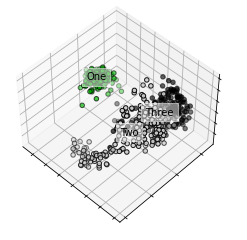

In [12]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('One', 0), ('Two', 1), ('Three', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()